## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [4]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [5]:
# useful for getting number of output classes
folders = glob('Datasets/train/*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [7]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [8]:
# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [10]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 84 images belonging to 4 classes.


In [12]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 67 images belonging to 4 classes.


In [13]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
3/3 [==============================] - 8s 3s/step - loss: 6.5732 - accuracy: 0.2857 - val_loss: 4.5380 - val_accuracy: 0.4478
Epoch 2/50
3/3 [==============================] - 7s 2s/step - loss: 8.9985 - accuracy: 0.2857 - val_loss: 12.6340 - val_accuracy: 0.1343
Epoch 3/50
3/3 [==============================] - 7s 2s/step - loss: 10.3034 - accuracy: 0.2024 - val_loss: 9.0549 - val_accuracy: 0.4478
Epoch 4/50
3/3 [==============================] - 8s 3s/step - loss: 6.3658 - accuracy: 0.2857 - val_loss: 3.4116 - val_accuracy: 0.1791
Epoch 5/50
3/3 [==============================] - 8s 3s/step - loss: 3.4997 - accuracy: 0.3452 - val_loss: 9.2364 - val_accuracy: 0.2836
Epoch 6/50
3/3 [==============================] - 8s 3s/step - loss: 5.1772 - accuracy: 0.4048 - val_loss: 10.0480 - val_accuracy: 0.2090
Epoch 7/50
3/3 [==============================] - 9s 3s/step - loss: 5.2971 - accuracy: 0.4762 - va

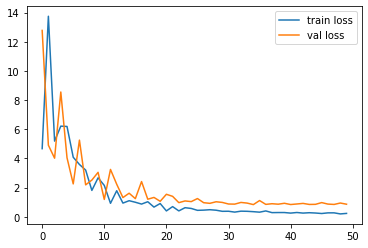

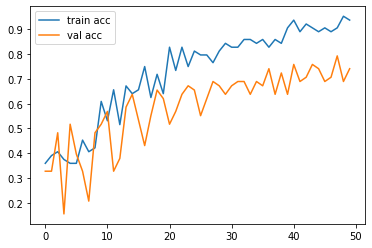

<Figure size 432x288 with 0 Axes>

In [14]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [15]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [16]:
y_pred = model.predict(test_set)


In [17]:
y_pred

array([[4.96364310e-02, 2.95827180e-01, 6.54536426e-01],
       [1.78199813e-01, 2.44136766e-01, 5.77663422e-01],
       [1.39702158e-02, 1.63318723e-01, 8.22711051e-01],
       [2.88288057e-01, 6.73756063e-01, 3.79558913e-02],
       [4.31347676e-02, 7.02476919e-01, 2.54388243e-01],
       [2.44312763e-01, 4.43084478e-01, 3.12602878e-01],
       [1.98655799e-02, 1.54440047e-03, 9.78590071e-01],
       [9.55363691e-01, 2.63606068e-02, 1.82757825e-02],
       [5.05808794e-06, 5.47951320e-04, 9.99446929e-01],
       [3.06976754e-02, 5.09155035e-01, 4.60147351e-01],
       [3.82237248e-02, 1.87363607e-04, 9.61588860e-01],
       [5.87523818e-01, 3.49916607e-01, 6.25595078e-02],
       [5.26475310e-01, 2.60276437e-01, 2.13248238e-01],
       [2.01955531e-03, 9.88920391e-01, 9.06013791e-03],
       [6.22469559e-03, 2.62930155e-01, 7.30845094e-01],
       [1.78496420e-01, 5.96382439e-01, 2.25121215e-01],
       [1.72736105e-02, 7.95034826e-01, 1.87691584e-01],
       [1.04219082e-03, 9.56047

In [18]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [19]:
y_pred

array([2, 2, 2, 1, 1, 1, 2, 0, 2, 1, 2, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2])

In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [21]:
model=load_model('model_resnet50.h5')

In [33]:
img_data

array([[[[-103.93513 , -116.77512 , -123.676125],
         [-103.93513 , -116.77512 , -123.676125],
         [-103.93513 , -116.77512 , -123.676125],
         ...,
         [-103.936356, -116.77612 , -123.67699 ],
         [-103.936035, -116.7758  , -123.67667 ],
         [-103.93564 , -116.7754  , -123.67626 ]],

        [[-103.93513 , -116.77512 , -123.676125],
         [-103.93513 , -116.77512 , -123.676125],
         [-103.93513 , -116.77512 , -123.676125],
         ...,
         [-103.935356, -116.77523 , -123.67623 ],
         [-103.93539 , -116.77526 , -123.67626 ],
         [-103.9354  , -116.775276, -123.67628 ]],

        [[-103.93513 , -116.77512 , -123.676125],
         [-103.93513 , -116.77512 , -123.676125],
         [-103.93513 , -116.77512 , -123.676125],
         ...,
         [-103.93519 , -116.77517 , -123.67631 ],
         [-103.93516 , -116.77514 , -123.67628 ],
         [-103.93516 , -116.77514 , -123.67628 ]],

        ...,

        [[-103.93548 , -116.77582 , -1

In [34]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))



In [35]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [36]:
x.shape

(224, 224, 3)

In [37]:
x=x/255

In [38]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [39]:
model.predict(img_data)

array([[1.0770741e-04, 1.0141081e-03, 9.9887818e-01]], dtype=float32)

In [40]:
a=np.argmax(model.predict(img_data), axis=1)

In [34]:
a==1

array([False])